# Sentiment Analysis of Social Media Content
## Data Science BootCamp Project


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup cell - Run this first
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Now import from src
from src import load_data, clean_data, map_sentiments

print("✓ Setup complete!")

✓ Setup complete!


In [3]:
# Load and clean data
df = load_data('../Data/sentimentdataset.csv')
df_clean = clean_data(df)

Dataset loaded successfully with shape: (732, 15)
Dropped 2 unnamed columns: ['Unnamed: 0.1', 'Unnamed: 0']
Starting data cleaning pipeline...
Cleaned 'Platform' column - unique values: 3
Cleaned 'Sentiment' column - unique values: 191
Cleaned 'Country' column - unique values: 33
Found and removed 21 duplicate rows.
New shape: (711, 13)

=== Missing Values ===
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

=== Duplicates ===
Found 0 duplicate rows.

=== Timestamp Validation ===
Timestamp column successfully converted to datetime.

=== Text Validation ===
Found 0 posts with no text.

=== Sentiment Mapping Results ===
Sentiment_Group
Joy              409
Neutral/Other    117
Sadness           83
Anger             59
Fear              25
Guilt             18
Name: count, dtype: int64

=== Cleaning Complete ===
Final shape: (711, 

In [4]:
# Check data validity
print(df_clean.describe())

                           Timestamp    Retweets       Likes         Year  \
count                            711  711.000000  711.000000   711.000000   
mean   2020-12-12 07:37:38.227848192   21.533052   42.949367  2020.482419   
min              2010-05-15 15:30:00    5.000000   10.000000  2010.000000   
25%              2019-03-05 17:20:00   17.500000   34.500000  2019.000000   
50%              2021-10-22 18:30:00   22.000000   43.000000  2021.000000   
75%              2023-02-27 16:32:30   25.000000   50.000000  2023.000000   
max              2023-10-22 20:45:00   40.000000   80.000000  2023.000000   
std                              NaN    7.125729   14.218822     2.825321   

            Month         Day        Hour  
count  711.000000  711.000000  711.000000  
mean     6.101266   15.514768   15.599156  
min      1.000000    1.000000    0.000000  
25%      3.000000   10.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000 

## Exploratory data analysis (EDA):

First, let's get an idea of the basic landscape of the dataset:

In [5]:
df_clean['Sentiment'].unique().shape

(191,)

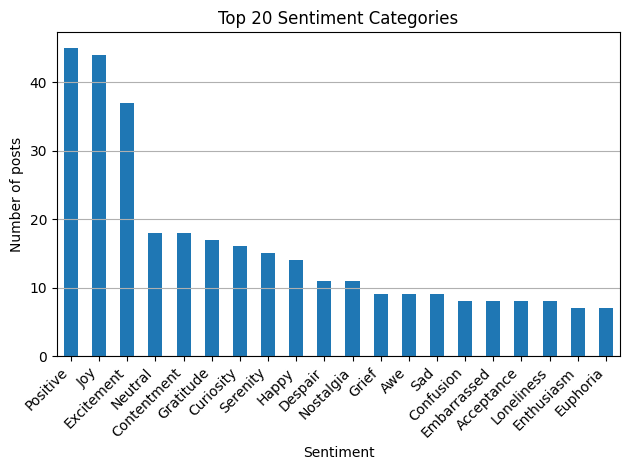

In [6]:
Sentiment_counts = df_clean['Sentiment'].value_counts()

n = 20  # Top n sentiment categories

plt.figure()
Sentiment_counts[:n].plot(kind='bar')
plt.ylabel('Number of posts')
plt.title(f"Top {n} Sentiment Categories")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Too many sentiments, perhaps we need to categorize and map them into 6 groups:

In [7]:
# Mapping sentiment categories to broader groups
# Check the result
print(df_clean['Sentiment_Group'].value_counts())
df_clean.shape

Sentiment_Group
Joy              409
Neutral/Other    117
Sadness           83
Anger             59
Fear              25
Guilt             18
Name: count, dtype: int64


(711, 15)

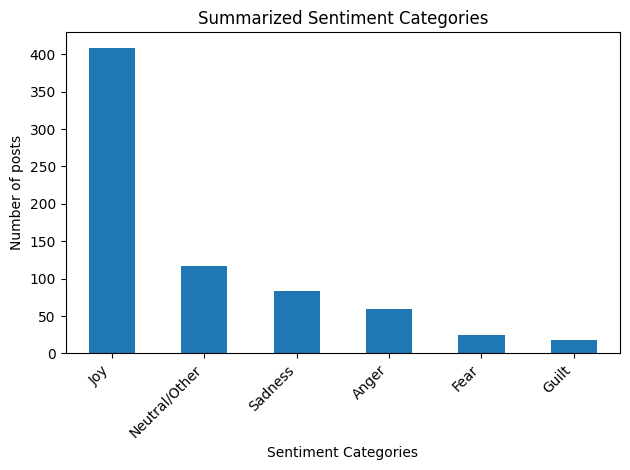

In [8]:
Sentiment_counts = df_clean['Sentiment_Group'].value_counts()

plt.figure()
Sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of posts')
plt.title(f"Summarized Sentiment Categories")
plt.xticks(rotation=45, ha='right')
# plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

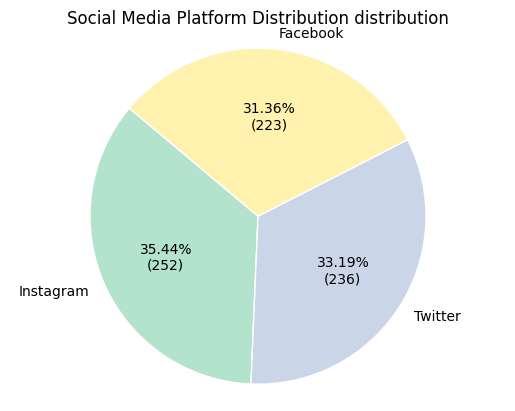

In [9]:
# Social Media Platform Distribution
platform_counts = df_clean['Platform'].value_counts()
colors = plt.get_cmap("Pastel2")(np.linspace(0, 0.65, len(platform_counts)))

total = platform_counts.sum()
plt.pie(
    platform_counts.values,
    labels=platform_counts.index.astype(str),
    colors=colors,
    startangle=140,
    wedgeprops=dict(edgecolor="white", linewidth=1),
    autopct=lambda p: f"{p:.2f}%\n({int(round(p*total/100))})"
)
plt.axis("equal")
plt.title("Social Media Platform Distribution distribution")
plt.show()


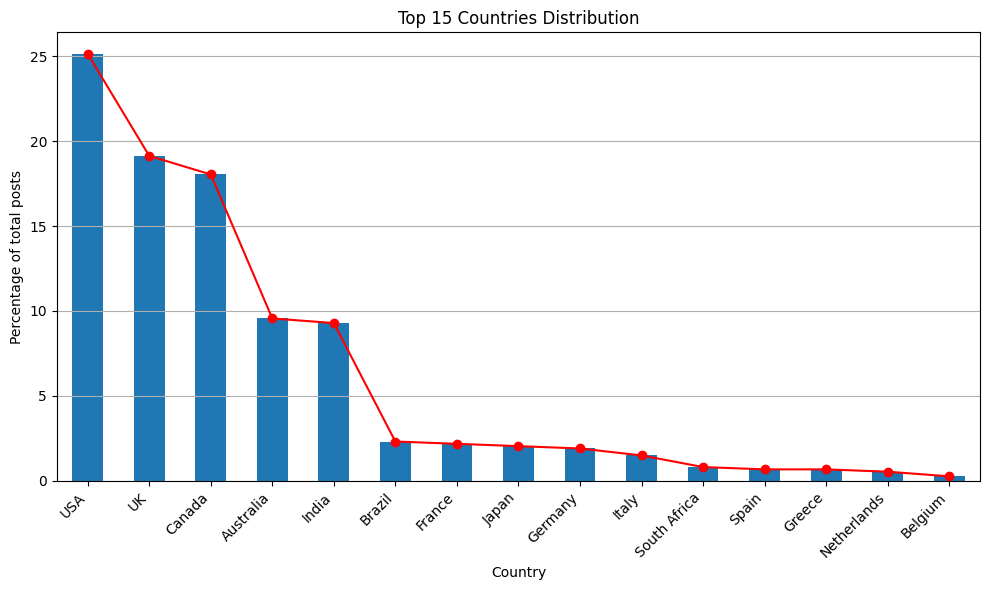

In [10]:
Country_counts = df_clean['Country'].value_counts()/(df['Country'].value_counts().sum())*100

n = 15  # Top n sentiment categories

plt.figure(figsize=(10,6))
Country_counts[:n].plot(kind='bar')
hold = Country_counts[:n].plot(kind='line', color='red', marker='o')
plt.ylabel('Percentage of total posts')
plt.title(f"Top {n} Countries Distribution")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

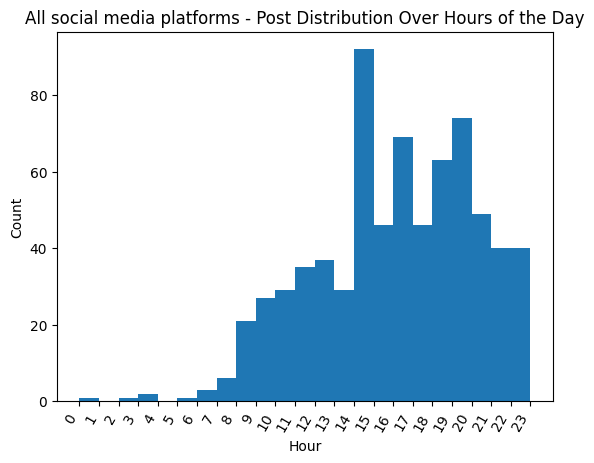

In [11]:
# Visualizing the distribution of posts over hours of the day
Hour_counts = df_clean['Hour'].value_counts().reindex(range(24), fill_value=0)
# Hour_counts.plot(kind='bar')
# hold = Hour_counts.plot(kind='line', color='red', marker='o')
plt.hist(df_clean['Hour'], bins=np.arange(0, 24, 1), density=False)  # centers on integers 0..23
plt.xticks(range(24),rotation=60, ha='right')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over Hours of the Day')
plt.show()

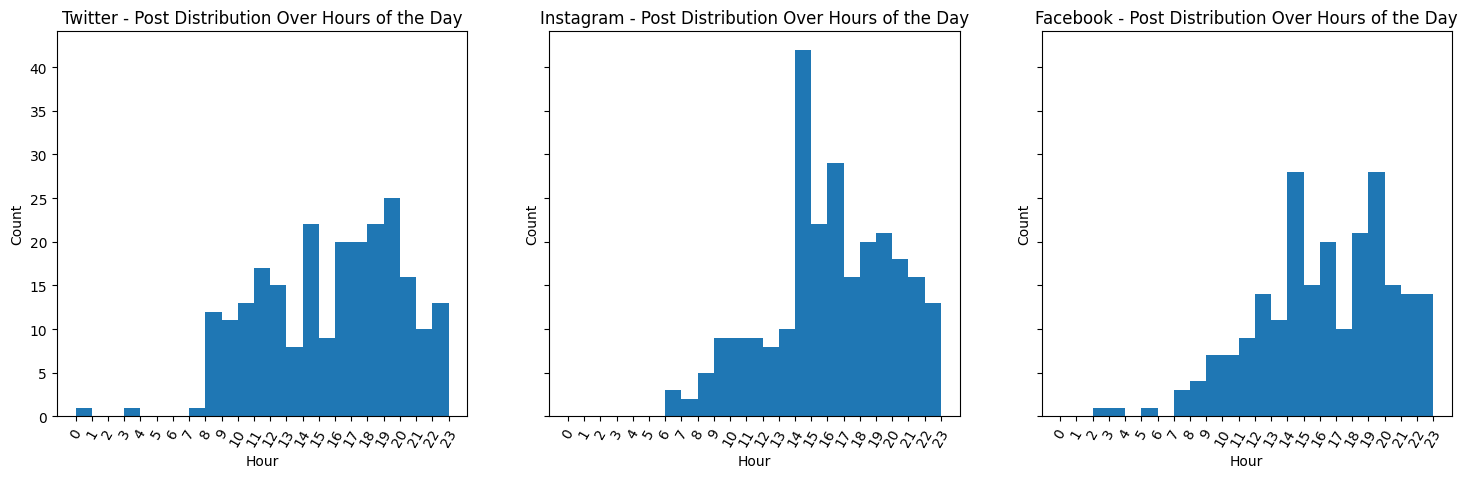

In [12]:
# Over different platforms
platforms = df_clean['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df_clean[df_clean['Platform'] == platform]
    ax.hist(platform_data['Hour'], bins=np.arange(0, 24, 1), density=False)
    ax.set_xticks(range(24))
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over Hours of the Day')
#plt.show()

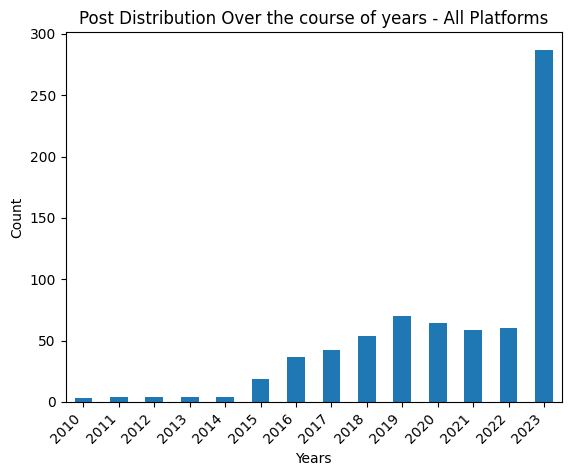

In [13]:
# Visualizing the distribution of posts over years
year_counts = df_clean['Year'].value_counts().reindex(range(2010,2024,1), fill_value=0)
year_counts.plot(kind='bar')
plt.xticks(range(14),rotation=45, ha='right')
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Post Distribution Over the course of years - All Platforms')
plt.show()

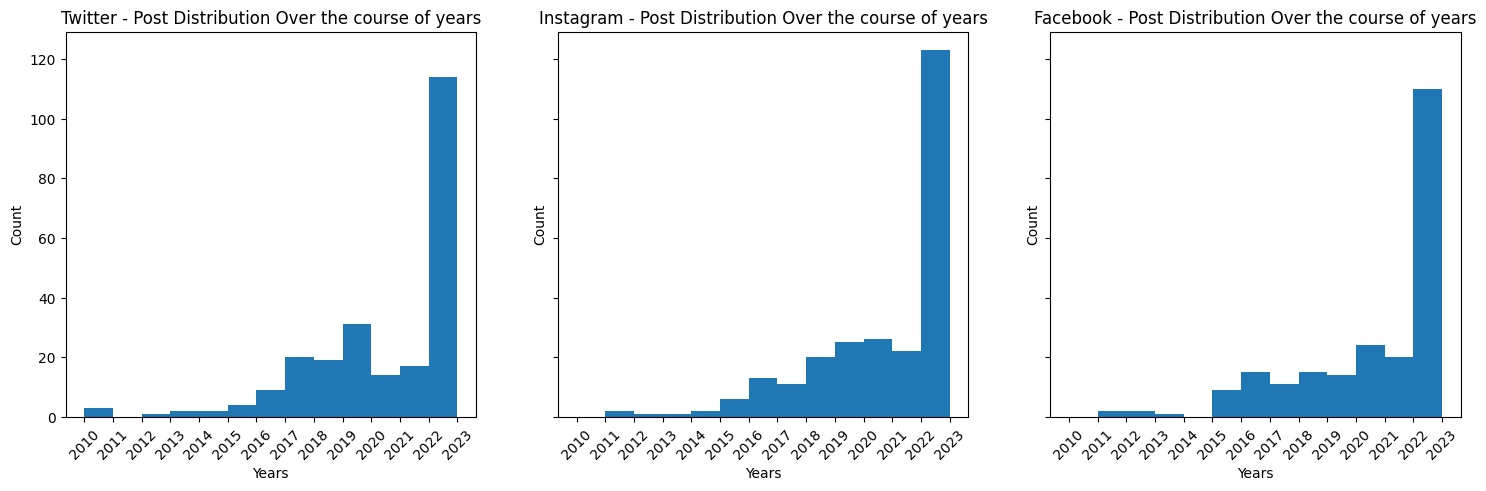

In [14]:
# Over different platforms
platforms = df_clean['Platform'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
axes = axes.flatten()
for ax, platform in zip(axes, platforms):
    platform_data = df_clean[df_clean['Platform'] == platform]
    ax.hist(platform_data['Year'], bins=np.arange(2010, 2024, 1), density=False)
    ax.set_xticks(np.arange(2010, 2024, 1))
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Years')
    ax.set_ylabel('Count')
    ax.set_title(f'{platform} - Post Distribution Over the course of years')
#plt.show()

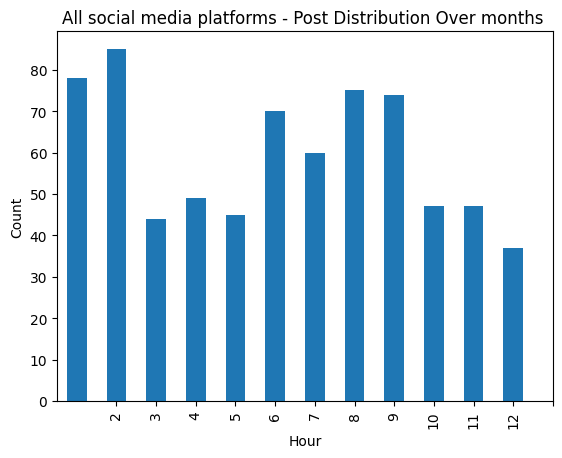

In [15]:
# Visualizing the distribution of posts over months
month_counts = df_clean['Month'].value_counts().reindex(range(1,13), fill_value=0)
month_counts.plot(kind='bar')
plt.xticks(range(1,13))
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('All social media platforms - Post Distribution Over months ')
plt.show()

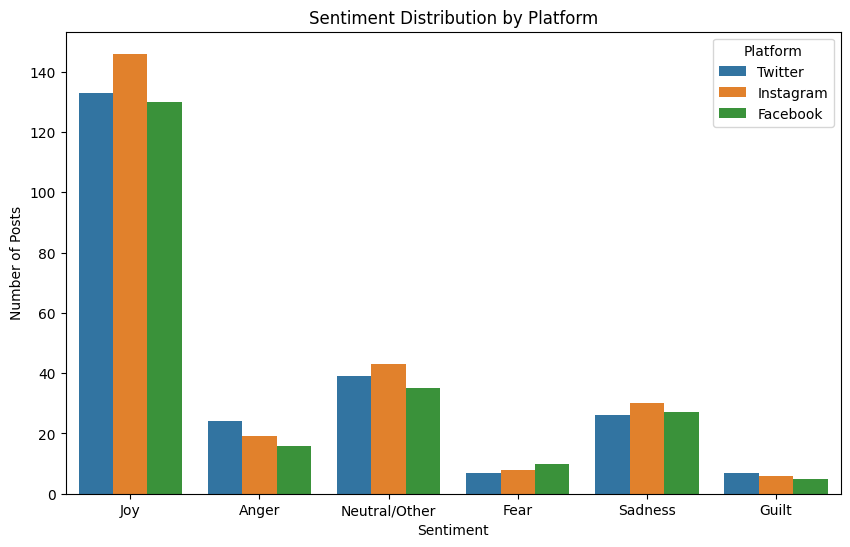

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Sentiment_Group', hue='Platform')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.legend(title='Platform')
plt.show()

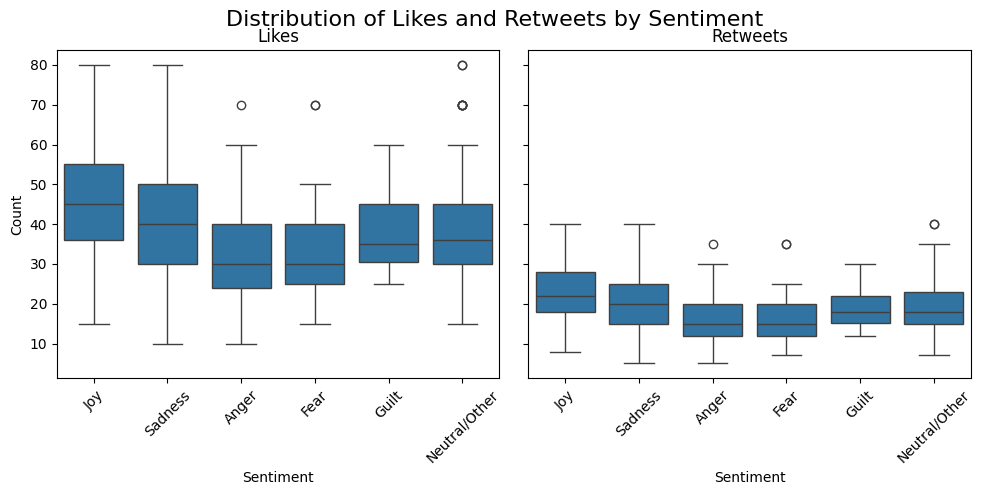

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Distribution of Likes and Retweets by Sentiment', fontsize=16)
# plt.figure(figsize=(6, 4))
sns.boxplot(ax=axes[0],data=df_clean, x='Sentiment_Group', y='Likes',order=['Joy', 'Sadness', 'Anger', 'Fear', 'Guilt', 'Neutral/Other'])
# plt.title('Distribution of Likes by Sentiment')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Likes')
# plt.tight_layout()
# plt.show()
axes[0].set_title('Likes')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# You can create a similar plot for 'Retweets'
# plt.figure(figsize=(6, 4))
sns.boxplot(ax=axes[1],data=df_clean, x='Sentiment_Group', y='Retweets',order=['Joy', 'Sadness', 'Anger', 'Fear', 'Guilt', 'Neutral/Other'])
# plt.title('Distribution of Retweets by Sentiment')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Retweets')
# plt.tight_layout()
# plt.show()
axes[1].set_title('Retweets')
axes[1].set_xlabel('Sentiment')
# The y-label is often omitted on the second plot when sharing an axis
axes[1].set_ylabel('')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

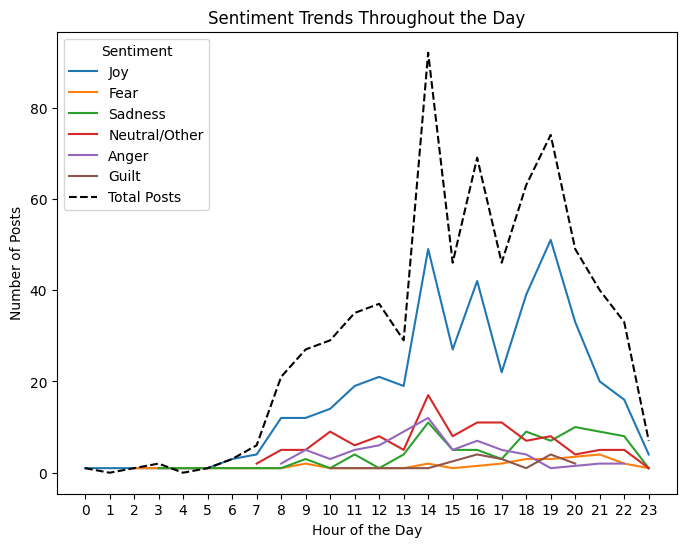

In [18]:
# Group by Hour and Sentiment, then count the occurrences
hourly_sentiment = df_clean.groupby(['Hour', 'Sentiment_Group']).size().reset_index(name='Count')

# total_counts = hourly_sentiment.groupby('Sentiment_Group')['Count'].transform('max')
# hourly_sentiment['Ratio'] = hourly_sentiment['Count'] / total_counts
Hour_counts = df_clean['Hour'].value_counts().reindex(range(24), fill_value=0)
plt.figure(figsize=(8, 6))
sns.lineplot(data=hourly_sentiment, x='Hour', y='Count', hue='Sentiment_Group')
hold = Hour_counts.plot(kind='line', color='black', linestyle='--', label='Total Posts')
plt.title('Sentiment Trends Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.legend(title='Sentiment')
plt.show()

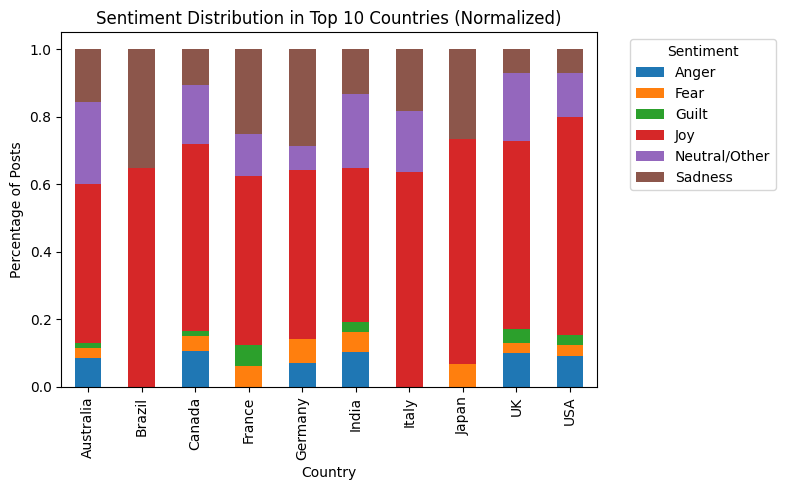

In [19]:
# The top 10 most frequent countries
top_10_countries = df_clean['Country'].value_counts().head(10).index

# Filter the DataFrame
df_top10 = df_clean[df_clean['Country'].isin(top_10_countries)]

# Group by Country and Sentiment, get counts, and calculate percentages
country_sentiment = df_top10.groupby(['Country', 'Sentiment_Group']).size().unstack(fill_value=0)
country_sentiment_percent = country_sentiment.apply(lambda x: x / x.sum(), axis=1)

# Plot the stacked bar chart
country_sentiment_percent.plot(
    kind='bar', 
    stacked=True, 
    figsize=(8, 5)
)
plt.title('Sentiment Distribution in Top 10 Countries (Normalized)')
plt.xlabel('Country')
plt.ylabel('Percentage of Posts')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

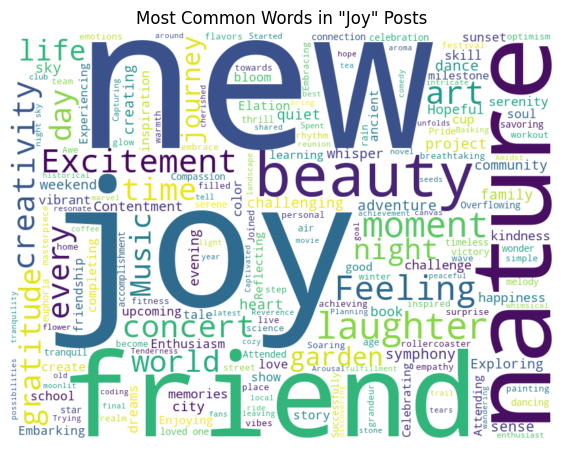

In [20]:
from wordcloud import WordCloud

# Filter text for a specific sentiment
hate_text = " ".join(text for text in df_clean[df_clean['Sentiment_Group'] == 'Joy']['Text'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=600, 
    background_color='white'
).generate(hate_text)

# Display the word cloud
plt.figure(figsize=(7, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the axes
plt.title('Most Common Words in "Joy" Posts')
plt.show()

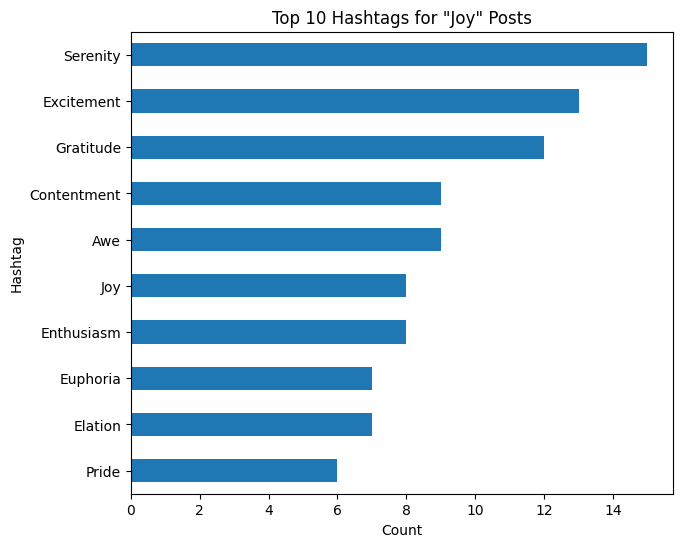

In [21]:
# 1. Filter for a sentiment and drop any missing hashtags
joy_hashtags = df_clean[df_clean['Sentiment_Group'] == 'Joy']['Hashtags'].dropna()

# 2. Split hashtags, 'explode' them into their own rows, and clean them
all_hashtags = (
    joy_hashtags.str.split(r'#')  # Split by '#'
    .explode()                   # Put each hashtag on its own row
    .str.strip()                 # Remove whitespace
)

# 3. Filter out empty strings and get the top 10
top_10_joy_hashtags = all_hashtags[all_hashtags != ''].value_counts().head(10)

# 4. Plot the results
plt.figure(figsize=(7, 6))
top_10_joy_hashtags.sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Hashtags for "Joy" Posts')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()

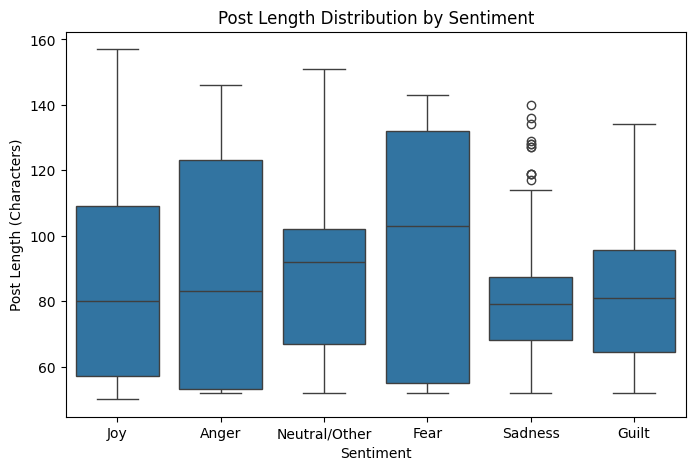

In [22]:
# 1. Create a new column for the length of the 'Text'
df_clean['post_length'] = df_clean['Text'].str.len()

# 2. Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='Sentiment_Group', y='post_length')
plt.title('Post Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Post Length (Characters)')
plt.show()

In [23]:
df_clean.to_csv('../Data/cleaned_sentiment_data.csv', index=False)